In [1]:
import geopandas as gpd
import datetime as dt 
import pandas as pd

departements = [
                #'departement-78-yvelines',
                #'departement-01-ain',
                'departement-25-doubs'
                ]

sd = dt.datetime.strptime('2024-07-01', '%Y-%m-%d').date()
ed = dt.datetime.strptime('2024-08-04', '%Y-%m-%d').date()
geos = []
for dept in departements:
    d = sd
    while d != ed:
        try:
            geo = gpd.read_file(dept + '/' + 'interface/' +'hexagones_'+d.strftime('%Y-%m-%d')+'.geojson')[['scale0', 'id', 'fire_prediction_raw', 'fire_prediction', 'fire_prediction_dept', 'geometry', 'nbfirepoint']]
            geo['departement'] = dept
            geo['date'] = d.strftime('%Y-%m-%d')
            print(d.strftime('%Y-%m-%d'))
            geos.append(geo)
        except Exception as e:
            print(e)
        d += dt.timedelta(days=1)

geos = pd.concat(geos)

departement-25-doubs/interface/hexagones_2024-07-01.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-02.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-03.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-04.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-05.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-06.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-07.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-08.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-09.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-10.geojson: No such file or directory
departement-25-doubs/interface/hexagones_2024-07-11.geojson: No such file or directory
departement-25-doubs/interface/hexagones_20

In [2]:
geos.groupby('departement')['nbfirepoint'].sum()

departement
departement-25-doubs    3.0
Name: nbfirepoint, dtype: float64

In [3]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['nbfirepoint'] > 0)].date.unique()

array([], dtype=object)

In [4]:
geos[(geos['departement'] == 'departement-01-ain') & (geos['date'] == '2024-08-01')].nbfirepoint.sum()

0.0

In [5]:
geos.departement.unique()

array(['departement-25-doubs'], dtype=object)

In [6]:
len(geos)

3474

In [7]:
geos['nbfirepoint'].unique(), geos['nbfirepoint'].sum()

(array([0., 1.]), 3.0)

In [8]:
import matplotlib.pyplot as plt

In [9]:
geos.date

0       2024-07-31
1       2024-07-31
2       2024-07-31
3       2024-07-31
4       2024-07-31
           ...    
1153    2024-08-02
1154    2024-08-02
1155    2024-08-02
1156    2024-08-02
1157    2024-08-02
Name: date, Length: 3474, dtype: object

In [10]:
geos[geos['date'] == '2024-08-01']['fire_prediction_raw']

0       6.691953
1       3.209009
2       3.622750
3       2.670059
4       3.622750
          ...   
1153    2.235095
1154    6.691953
1155    6.691953
1156    6.691953
1157    1.842975
Name: fire_prediction_raw, Length: 1158, dtype: float64

id
7.0     2.0
8.0     3.0
9.0     2.0
10.0    2.0
11.0    2.0
12.0    2.0
Name: fire_prediction, dtype: float64

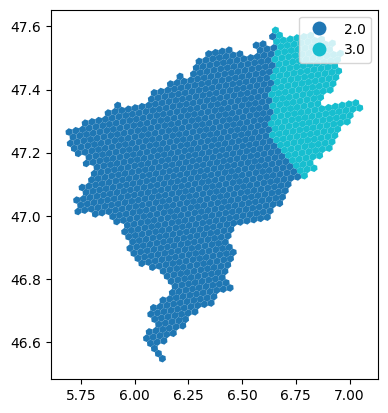

In [11]:
geos[geos['date'] == '2024-08-01'].plot('fire_prediction', categorical=True, legend=True)
geos[geos['date'] == '2024-08-01'].groupby('id')['fire_prediction'].mean()

In [12]:
geos['nbfirepoint'].unique()

array([0., 1.])

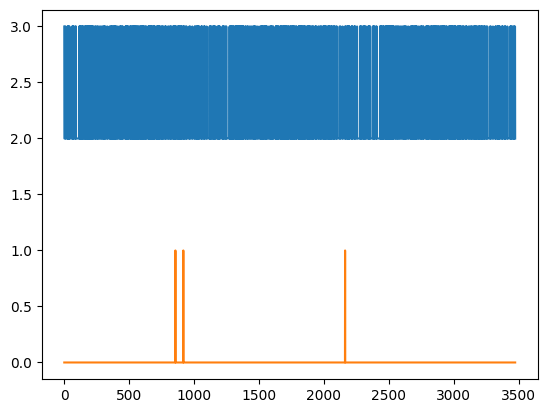

In [13]:
plt.plot(geos['fire_prediction'].values)
plt.plot(geos['nbfirepoint'].values)

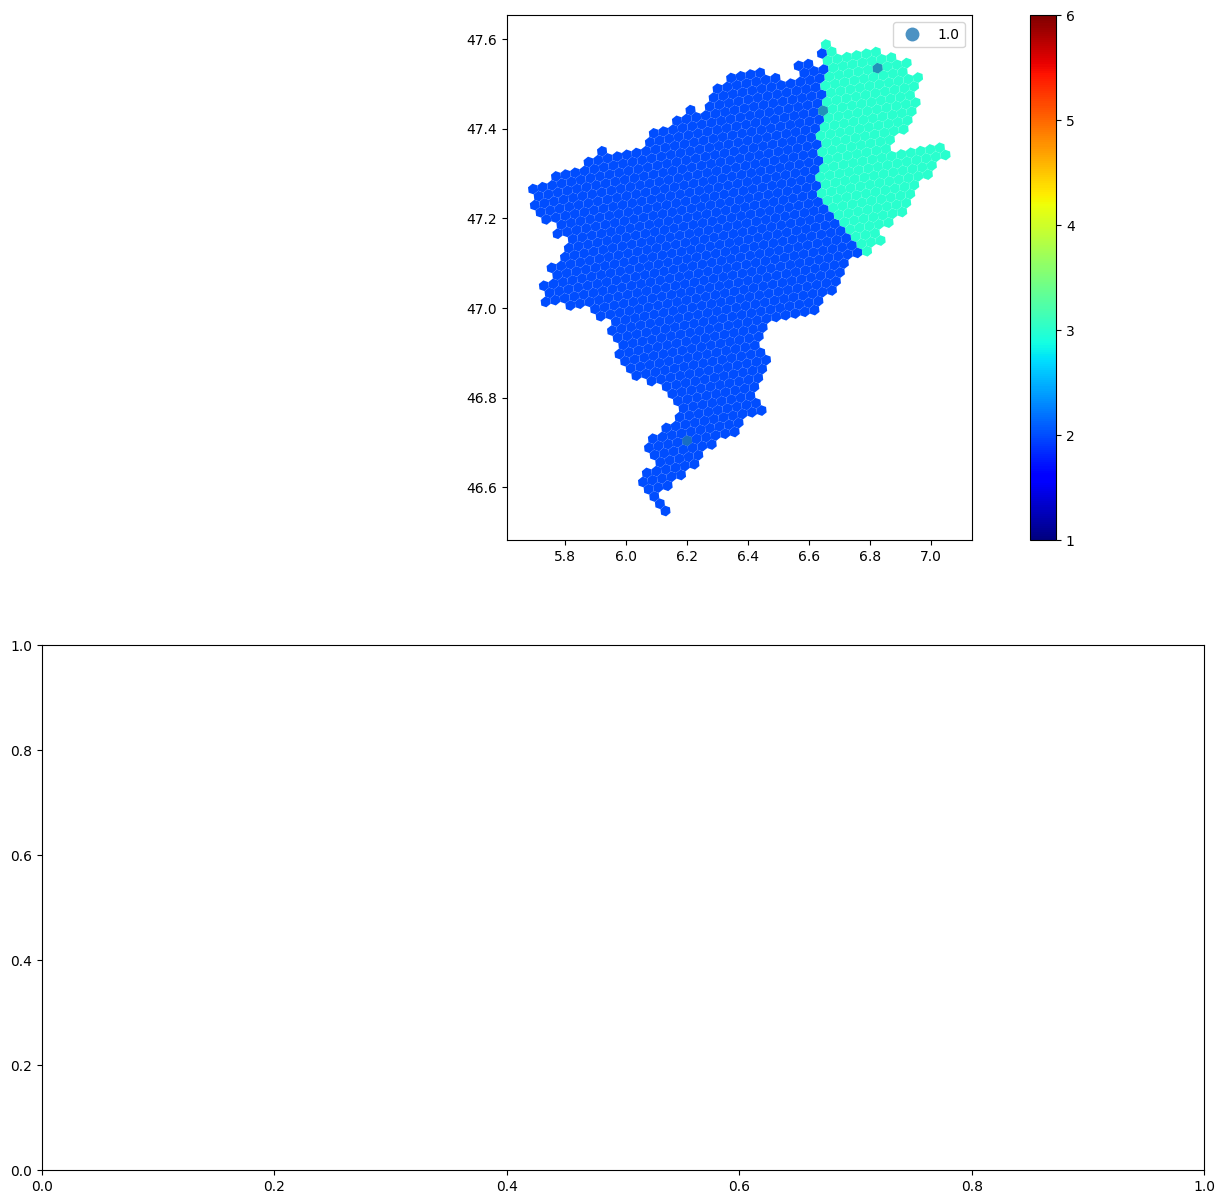

In [14]:
gb = geos.groupby(['scale0', 'departement'])[['fire_prediction']].mean().reset_index()
gb2 = geos.groupby(['scale0', 'departement'])[['nbfirepoint']].sum().reset_index()
gb['nbfirepoint'] = gb2['nbfirepoint']
gb = gb.set_index('scale0').join(other=geos[geos['date'] ==  '2024-08-01'][['geometry', 'scale0']].set_index('scale0'), on='scale0').reset_index()
gb = gpd.GeoDataFrame(gb, geometry=gb.geometry)

fig, ax = plt.subplots(len(departements) + 1, figsize=(15,15))

for i, dept in enumerate(departements):
    gb[gb['departement'] == dept].plot(column='fire_prediction', vmin=1, vmax=6, legend=True, ax=ax[i], cmap='jet')
    gb[(gb['nbfirepoint'] > 0) & (gb['departement'] == dept)].plot(column='nbfirepoint', ax=ax[i], alpha=0.8, legend=True, categorical=True)

In [15]:
# Yvelines

if 'departement-78-yvelines' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-78-yvelines') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(10,5))
    geosFYvelines[geosFYvelines['date'] == '2024-08-01'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-08-01') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, legend=True, categorical=True, ax=ax)

In [16]:
# Ain

if 'departement-01-ain' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-01-ain') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(15,10))
    geosFYvelines[geosFYvelines['date'] == '2024-07-23'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-07-23') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, cmap='binary', ax=ax, vmin=0)

['2024-07-31' '2024-08-01']
date
2024-07-31    2.0
2024-08-01    1.0
Name: nbfirepoint, dtype: float64


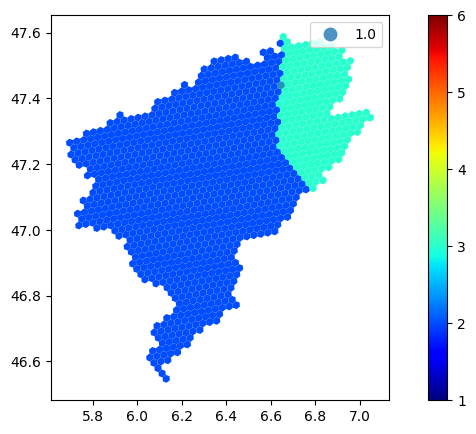

In [17]:
# Doubs

if 'departement-25-doubs' in geos.departement.unique():
    datewfire = geos[geos['nbfirepoint'] > 0].date
    geosFYvelines = geos[(geos['departement'] == 'departement-25-doubs') & (geos['date'].isin(datewfire))]
    print(geosFYvelines.date.unique())
    print(geosFYvelines.groupby('date')['nbfirepoint'].sum())
    fig, ax = plt.subplots(1, figsize=(10,5))
    geosFYvelines[geosFYvelines['date'] == '2024-08-01'].plot(column='fire_prediction', ax=ax, vmin=1, vmax=6, cmap='jet', legend=True)
    geosFYvelines[(geosFYvelines['date'] == '2024-08-01') & (geosFYvelines['nbfirepoint'] > 0)].plot(column='nbfirepoint', alpha=0.8, legend=True, categorical=True, ax=ax)

In [18]:
geosFYvelines[geosFYvelines['date'] == '2024-08-01']['fire_prediction'].unique()

array([3., 2.])

In [19]:
geos.date.values[0]

'2024-07-31'

In [20]:
gb3 = geos.groupby(by=['id', 'date', 'departement'])[['fire_prediction', 'fire_prediction_raw']].mean().reset_index()
gb4 = geos.groupby(by=['id', 'date'])[['nbfirepoint']].sum().reset_index()
gb3['nbfirepoint'] = gb4['nbfirepoint']
gb3.sort_values('date', inplace=True)
gb3

,id,date,departement,fire_prediction,fire_prediction_raw,nbfirepoint
0,7.0,2024-07-31,departement-25-doubs,2.0,3.175678,0.0
15,12.0,2024-07-31,departement-25-doubs,2.0,3.044940,0.0
3,8.0,2024-07-31,departement-25-doubs,3.0,5.338036,1.0
6,9.0,2024-07-31,departement-25-doubs,2.0,3.930183,1.0
9,10.0,2024-07-31,departement-25-doubs,2.0,2.134828,0.0
12,11.0,2024-07-31,departement-25-doubs,2.0,2.118031,0.0
1,7.0,2024-08-01,departement-25-doubs,2.0,2.670059,0.0
4,8.0,2024-08-01,departement-25-doubs,3.0,6.691953,1.0
7,9.0,2024-08-01,departement-25-doubs,2.0,3.622750,0.0
16,12.0,2024-08-01,departement-25-doubs,2.0,3.209009,0.0


In [21]:
import numpy as np

if 'departement-01-ain' in geos.departement.unique():
    val = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')['fire_prediction'].values
    valbin = gb3[gb3['departement'] == 'departement-01-ain'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Ain')

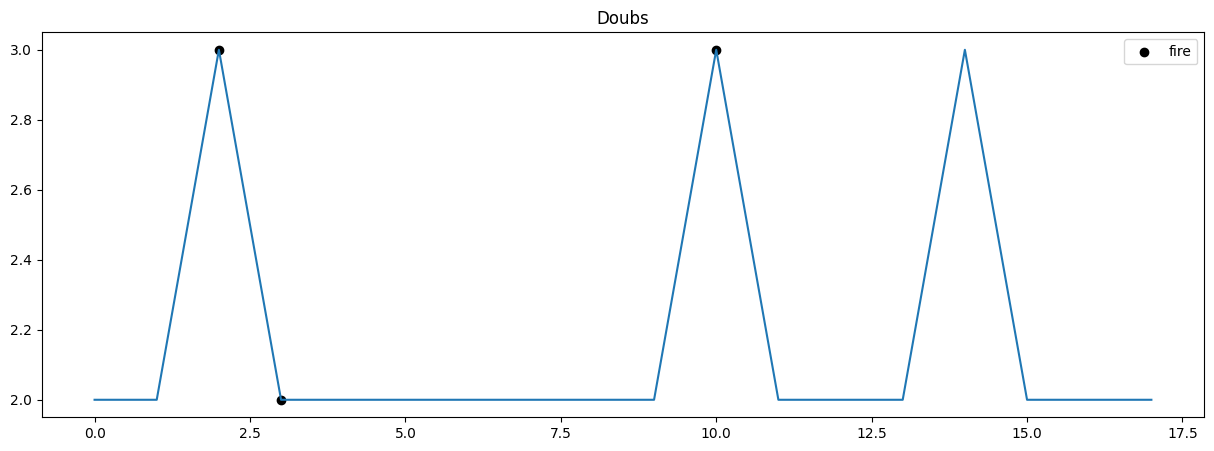

In [22]:
import numpy as np

if 'departement-25-doubs' in geos.departement.unique():
    val = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')['fire_prediction'].values
    valbin = gb3[gb3['departement'] == 'departement-25-doubs'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Doubs')

In [23]:
import numpy as np

if 'departement-78-yvelines' in geos.departement.unique():

    val = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')['fire_prediction'].values
    valbin = gb3[gb3['departement'] == 'departement-78-yvelines'].sort_values('date')['nbfirepoint'].values
    plt.figure(figsize=(15,5))
    plt.plot(val)
    mask = np.argwhere(valbin > 0)
    plt.scatter(mask[:,0], val[mask], label='fire', c='black')
    plt.legend()
    plt.title('Yvelines')

In [24]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def my_f1_score(ytrue , ypredNumpy, isBin : bool, weights = None):

    bounds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ytrueRegNumpy = ypredNumpy
    ytrueNumpy = ytrue

    weightsNumpy = np.ones(ypredNumpy.shape[0])
    maxi = np.max(ypredNumpy)

    bestScore = 0.0
    prec = 0.0
    rec = 0.0
    bestBound = 0.0
    for bound in bounds:
        if isBin:
            yBinPred = (ypredNumpy > bound * maxi).astype(int)
        else:
            yBinPred = (ytrueRegNumpy > bound * maxi).astype(int)

        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        if f1 > bestScore:
            bestScore = f1
            bestBound =  bound
            prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
            rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
    
    if not isBin:
        yBinPred = (ypredNumpy > bestBound * maxi).astype(int)
        f1 = f1_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        bestScore = f1
        bestBound =  bound
        prec = precision_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)
        rec = recall_score(ytrueNumpy, yBinPred, sample_weight=weightsNumpy)

    return (bestScore, prec, rec, bestBound, ypredNumpy > bestBound * maxi)

res = my_f1_score((gb3.nbfirepoint > 0).astype(int), gb3.fire_prediction_raw.values, None)
res

(0.7499999999999999,
 0.6,
 1.0,
 0.9,
 array([False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False]))

In [25]:
def class_risk(ytrue, yclass) -> dict:
    
    res = {}
    uniqueClass = np.unique(yclass)
    for c in uniqueClass:
        classIndex = np.argwhere(yclass == c)
        classBin = ytrue[classIndex] > 0
        meanF = round(np.mean(classBin), 3)
        res[c] = (meanF)
    return res

cr = class_risk(gb3.nbfirepoint.values, gb3.fire_prediction.values)
cr

{2.0: 0.067, 3.0: 0.667}

Text(0.5, 0, 'Class')

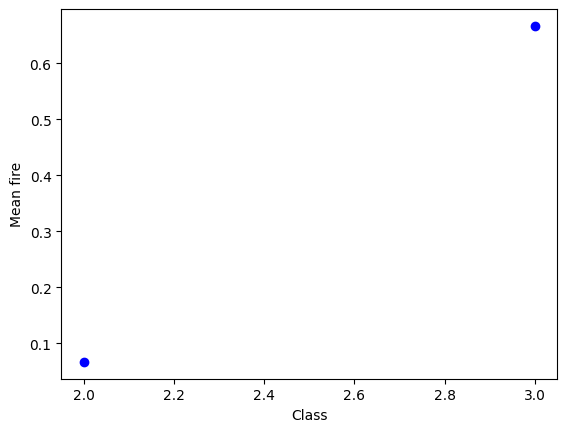

In [26]:
for key, val in cr.items():
    plt.scatter(key, val, c='blue')

plt.ylabel('Mean fire')
plt.xlabel('Class')